In [1]:
#Import the packages needed.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

# In this tutorial, we will be training a lot of models. In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.19.0


In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


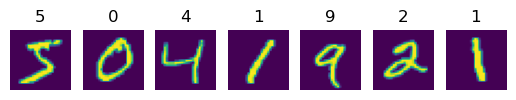

In [7]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [9]:
print('Training samples:',len(x_train))
print('Test samples:',len(x_test))

print('Tensor size:',x_train[0].shape)
print('First 10 digits are:', y_train[:10])
print('Type of data is ',type(x_train))

Training samples: 60000
Test samples: 10000
Tensor size: (28, 28)
First 10 digits are: [5 0 4 1 9 2 1 3 1 4]
Type of data is  <class 'numpy.ndarray'>


In [11]:
print('Min intensity value: ',x_train.min())
print('Max intensity value: ',x_train.max())

Min intensity value:  0
Max intensity value:  255


In [13]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [17]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),  # Explicit input layer
    keras.layers.Flatten(),  # Flattens 28x28 into a 1D vector
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

model.summary()  # Print model architecture

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.layers[1].weights

[<KerasVariable shape=(784, 10), dtype=float32, path=sequential_1/dense_1/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_1/bias>]

In [21]:
print('Digit to be predicted: ',y_train[0])
model(np.expand_dims(x_train[0],0))

Digit to be predicted:  5


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08946571, 0.04699846, 0.06514139, 0.18826622, 0.06381641,
        0.10759597, 0.13826787, 0.08575495, 0.08566092, 0.12903203]],
      dtype=float32)>

In [23]:
model.compile(optimizer='sgd',loss='categorical_crossentropy')

In [25]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First 3 training labels:",y_train[:3])
print("One-hot-encoded version:\n",y_train_onehot[:3])

First 3 training labels: [5 0 4]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [27]:
model.fit(x_train,y_train_onehot)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - loss: 1.1249


In [29]:
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - loss: 0.4747 - val_loss: 0.4010
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - loss: 0.4089 - val_loss: 0.3682
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - loss: 0.3781 - val_loss: 0.3508


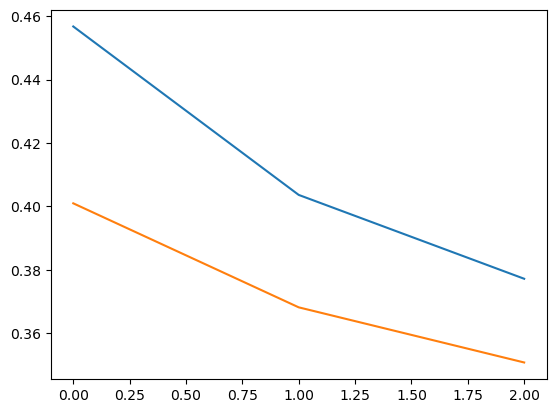

In [31]:
for x in ['loss','val_loss']:
    plt.plot(hist.history[x])

In [33]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3,batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8982 - loss: 0.3677 - val_acc: 0.9058 - val_loss: 0.3454
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8993 - loss: 0.3645 - val_acc: 0.9068 - val_loss: 0.3418
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9018 - loss: 0.3599 - val_acc: 0.9071 - val_loss: 0.3389


In [37]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),  # Explicit input layer
    keras.layers.Flatten(),  # Flattens 28x28 into a 1D vector
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])
model.compile(optimizer=keras.optimizers.SGD(momentum=0.5),loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=5, batch_size=64)  

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7141 - loss: 1.1382 - val_acc: 0.8825 - val_loss: 0.4801
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - acc: 0.8768 - loss: 0.4750 - val_acc: 0.8938 - val_loss: 0.4004
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - acc: 0.8897 - loss: 0.4103 - val_acc: 0.9028 - val_loss: 0.3686
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - acc: 0.8947 - loss: 0.3848 - val_acc: 0.9063 - val_loss: 0.3488
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - acc: 0.9003 - loss: 0.3622 - val_acc: 0.9098 - val_loss: 0.3360


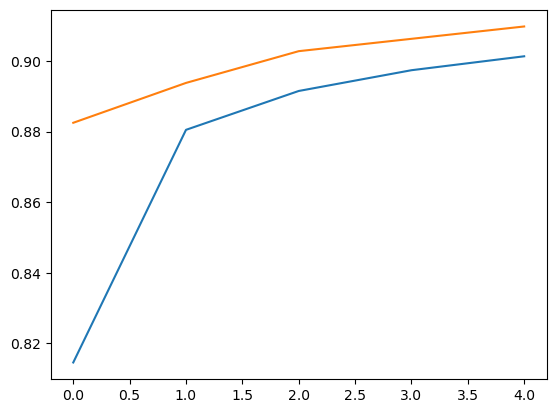

In [39]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

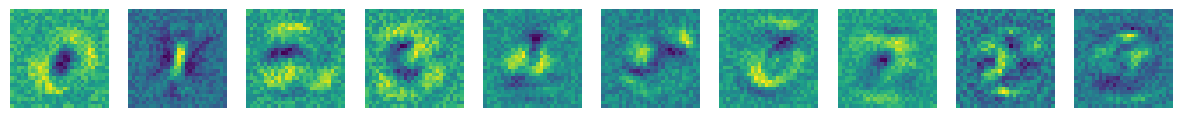

In [41]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

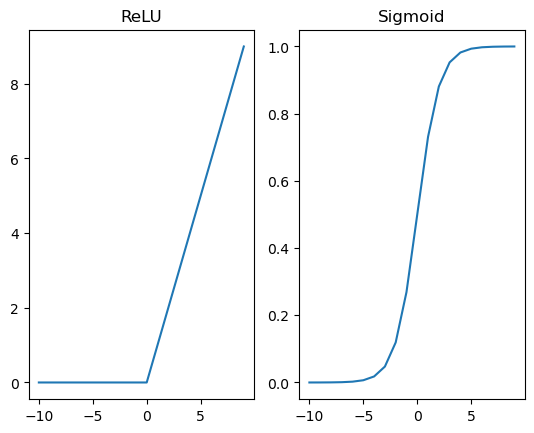

In [43]:
def plot_function(f,name=''):
    plt.plot(range(-10,10), [f(tf.constant(x,dtype=tf.float32)) for x in range(-10,10)])
    plt.title(name)

plt.subplot(121)
plot_function(tf.nn.relu,'ReLU')
plt.subplot(122)
plot_function(tf.nn.sigmoid,'Sigmoid')


In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100))     # 784 inputs, 100 outputs
model.add(keras.layers.ReLU())         # Activation Function
model.add(keras.layers.Dense(10))      # 100 inputs, 10 outputs

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [49]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8792 - loss: 0.4365 - val_acc: 0.9556 - val_loss: 0.1498
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9609 - loss: 0.1358 - val_acc: 0.9688 - val_loss: 0.1065
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9715 - loss: 0.0968 - val_acc: 0.9718 - val_loss: 0.0931
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9776 - loss: 0.0741 - val_acc: 0.9733 - val_loss: 0.0920
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9818 - loss: 0.0619 - val_acc: 0.9771 - val_loss: 0.0787


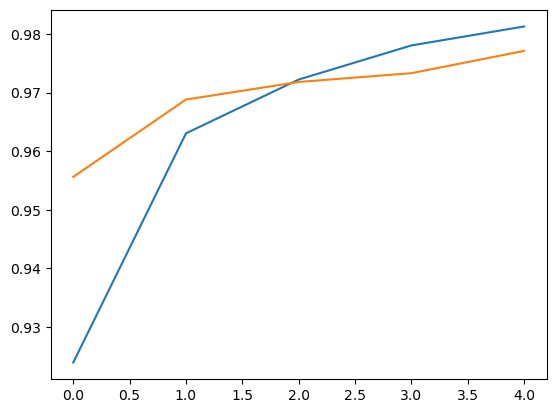

In [51]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

In [53]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation=None))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
import requests

url = "https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/computer-vision-tf/tfcv.py"
response = requests.get(url)

# Save the content to a file
with open("tfcv.py", "wb") as file:
    file.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


In [59]:
from tfcv import *
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

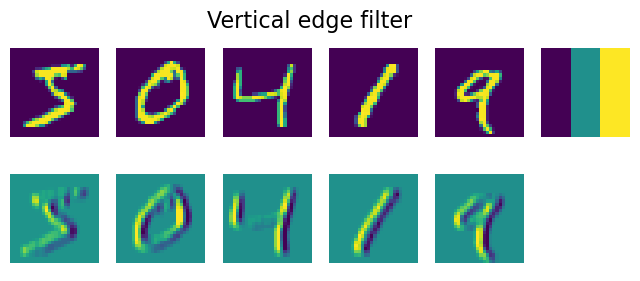

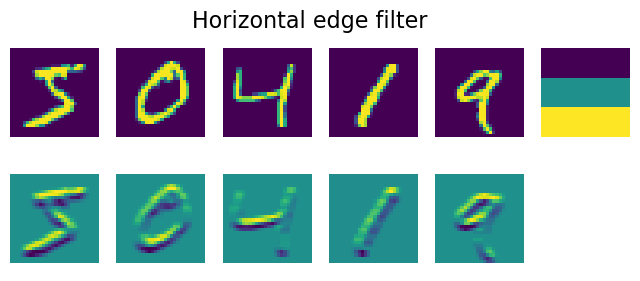

In [61]:
plot_convolution(x_train[:5],[[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]],'Vertical edge filter')
plot_convolution(x_train[:5],[[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]],'Horizontal edge filter')

In [65]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),  # Input layer (recommended approach to avoid the warning)
    keras.layers.Conv2D(filters=9, kernel_size=(5, 5), activation='relu'),  # Convolutional layer
    keras.layers.Flatten(),  # Flatten the output of the convolutional layer
    keras.layers.Dense(10)  # Dense layer for 10 output classes
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 9)      │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        51,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,084 (203.45 KB)

 Trainable params: 52,084 (203.45 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
x_train_c = np.expand_dims(x_train,3)
x_test_c = np.expand_dims(x_test,3)
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8937 - loss: 0.3714 - val_acc: 0.9728 - val_loss: 0.0938
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9715 - loss: 0.1014 - val_acc: 0.9790 - val_loss: 0.0708
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9807 - loss: 0.0678 - val_acc: 0.9816 - val_loss: 0.0594


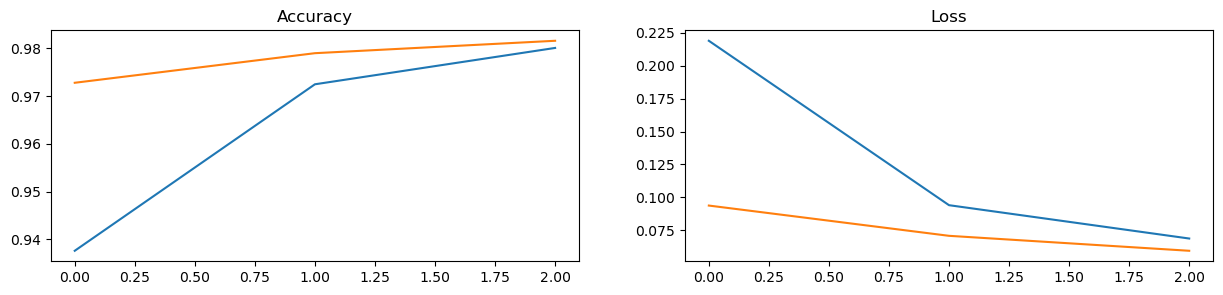

In [69]:
plot_results(hist)

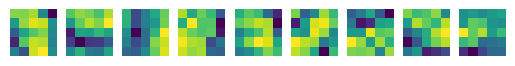

In [71]:
fig,ax = plt.subplots(1,9)
l = model.layers[0].weights[0]
for i in range(9):
    ax[i].imshow(l[...,0,i])
    ax[i].axis('off')

In [73]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(),    
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         3,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,490 (33.16 KB)

 Trainable params: 8,490 (33.16 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
hist = model.fit(x_train_c,y_train,validation_data=(x_test_c,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.8730 - loss: 0.4272 - val_acc: 0.9772 - val_loss: 0.0721
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9753 - loss: 0.0828 - val_acc: 0.9814 - val_loss: 0.0576
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9821 - loss: 0.0563 - val_acc: 0.9866 - val_loss: 0.0443


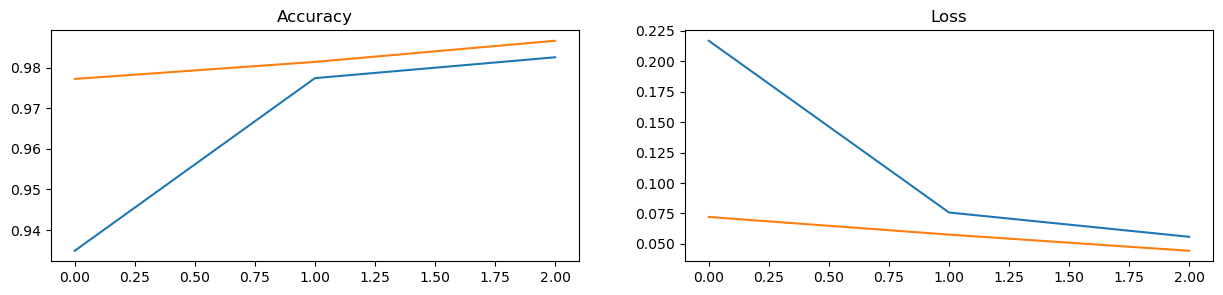

In [77]:
plot_results(hist)

In [79]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 70s 0us/step


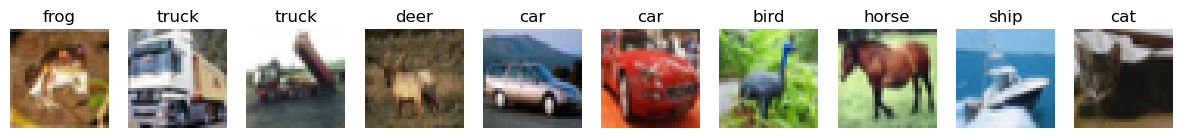

In [81]:
display_dataset(x_train,y_train,classes=classes)

In [83]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(84, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.3341 - loss: 1.8082 - val_acc: 0.4795 - val_loss: 1.4386
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.5028 - loss: 1.3841 - val_acc: 0.5082 - val_loss: 1.3655
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.5532 - loss: 1.2544 - val_acc: 0.5660 - val_loss: 1.2317
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.5876 - loss: 1.1696 - val_acc: 0.5721 - val_loss: 1.2196
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.6112 - loss: 1.1026 - val_acc: 0.6042 - val_loss: 1.1340
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.6269 - loss: 1.0508 - val_acc: 0.6074 - val_loss: 1.1234
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.6464 - loss: 1.0002 - val_acc: 0.5874 - val_loss: 1.1974
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.6650 - loss: 0.9522 - val_acc: 0.6005 - val_loss: 1.1316
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━

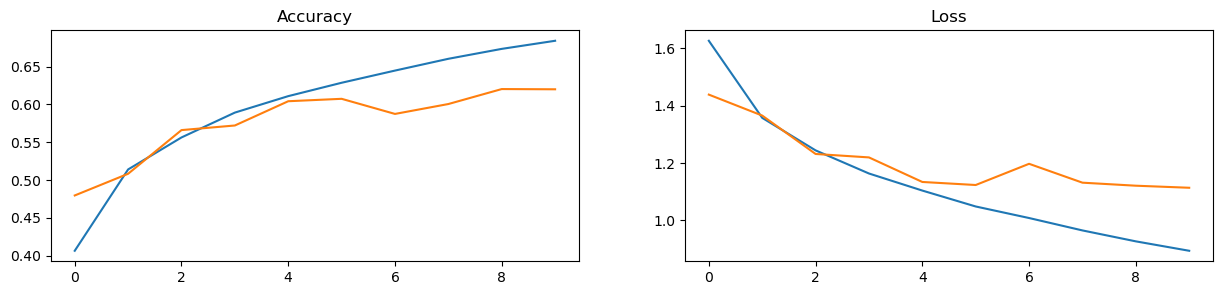

In [87]:
plot_results(hist)

In [ ]:
#url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'

data_dir = 'C:/Users/ADMIN/Downloads/data/kagglecatsanddogs_5340/PetImages'
# Check the image directories (Cat and Dog subdirectories)
def check_image_dir(path):
    images = list(os.glob(path))  # Use glob to get the files matching the pattern
    print(f"Found {len(images)} images in {path}")

# Check for the images inside the Cat and Dog directories
check_image_dir('C:/Users/ADMIN/Downloads/data/PetImages/Cat/*.jpg')
check_image_dir('C:/Users/ADMIN/Downloads/data/PetImages/Dog/*.jpg')

# Dataset parameters
batch_size = 32

# Load the dataset (Training and Testing split)
ds_train = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=13,
    image_size=(224, 224),
    batch_size=batch_size
)

ds_test = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=13,
    image_size=(224, 224),
    batch_size=batch_size
)

# Print the dataset info
print("Training Dataset:")
print(ds_train)
print("Testing Dataset:")
print(ds_test)


In [ ]:
ds_train.class_names

In [ ]:
for x,y in ds_train:
    print(f"Training batch shape: features={x.shape}, labels={y.shape}")
    x_sample, y_sample = x,y
    break
    
display_dataset(x_sample.numpy().astype(np.uint8),np.expand_dims(y_sample,1),classes=ds_train.class_names)

In [ ]:
import requests
urls = [
    "https://mslearntensorflowlp.blob.core.windows.net/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5",
    "https://mslearntensorflowlp.blob.core.windows.net/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    "https://mslearntensorflowlp.blob.core.windows.net/models/imagenet_class_index.json"
]
for url in urls:
    filename = os.path.join(models_dir, url.split('/')[-1])
    response = requests.get(url)
    
    # Save file to the models directory
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded: {filename}")

In [ ]:
vgg = tf.keras.applications.VGG16()

In [ ]:
inp = keras.applications.vgg16.preprocess_input(x_sample[:1])

res = vgg(inp)
print(f"Most probable class = {tf.argmax(res,1)}")

keras.applications.vgg16.decode_predictions(res.numpy())

In [ ]:
vgg.summary()

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
vgg = keras.applications.VGG16(include_top=False)

inp = keras.applications.vgg16.preprocess_input(x_sample[:1])
res = vgg(inp)
print(f"Shape after applying VGG-16: {res[0].shape}")
plt.figure(figsize=(15,3))
plt.imshow(res[0].numpy().reshape(-1,512))

In [ ]:
num = batch_size*25
ds_features_train = ds_train.take(25).map(lambda x,y : (vgg(x),y))
ds_features_test = ds_test.take(10).map(lambda x,y : (vgg(x),y))

for x,y in ds_features_train:
    print(x.shape,y.shape)
    break

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(7,7,512)),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(ds_features_train, validation_data=ds_features_test)

In [ ]:
model = keras.models.Sequential()
model.add(keras.applications.VGG16(include_top=False,input_shape=(224,224,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.layers[0].trainable = False

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(ds_train.take(50), validation_data=ds_test.take(10))